In [1]:
from aif360.datasets import StandardDataset
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [2]:
custom_colors = ['#784888', '#94b3c4', '#897cac', '#d8bfd4', '#f6e8e7']
#custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
#complementary_colors = ['#a9d0f5', '#f3ba8c', '#98e698', '#f5a9a9', '#d8b5d8', '#d2a6a6', '#f5a9f2', '#d8d8d8']

#full_palette = custom_colors + complementary_colors
#sns.set_palette(full_palette)

sns.set_palette(custom_colors)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['legend.fontsize'] =30

In [3]:
df = pd.read_pickle('../data/lifesnaps/lifesnapsv2.pkl')
df['id'] = df['id'].astype(str)
df

,id,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,...,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,label_stress_sema,label_panas_negative_affect,label_stai_stress
0,621e332267b776a24092a584,34.036874,57.4370,37.914,95.60,17.2,72.0,0.733333,0.70,0.700000,...,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428,NaN,NaN,NaN
1,621e30e467b776a240e817c7,33.274919,52.5365,38.161,94.50,17.2,72.0,0.733333,0.70,0.700000,...,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428,1.0,NaN,NaN
2,621e367e67b776a24087d75d,33.019585,62.9565,32.762,96.00,12.0,72.0,0.733333,0.70,0.700000,...,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428,NaN,NaN,NaN
3,621e360b67b776a24039709f,34.175203,68.3210,31.413,96.00,15.4,72.0,0.733333,0.65,0.700000,...,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428,NaN,NaN,NaN
4,621e2f6167b776a240e082a9,34.892637,62.5580,24.507,97.20,13.0,72.0,0.666667,0.70,0.666667,...,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,621e300767b776a2404dc717,33.186399,62.3900,34.057,95.85,15.0,72.0,0.733333,0.70,0.700000,...,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139,NaN,NaN,NaN
4905,621e309b67b776a240b532b0,33.845802,62.3900,34.057,96.00,15.0,72.0,0.733333,0.70,0.700000,...,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139,NaN,NaN,NaN
4906,621e342e67b776a2404ce460,33.864390,51.0640,80.576,96.00,17.2,72.0,0.733333,0.65,0.700000,...,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139,NaN,NaN,NaN
4907,621e309267b776a240ae1cdb,34.121912,62.3900,34.057,96.00,15.0,72.0,0.733333,0.70,0.700000,...,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage',
       'exertion_points_percentage', 'responsiveness_points_percentage',
       'daily_temperature_variation', 'calories', 'filteredDemographicVO2Max',
       'distance', 'bpm', 'lightly_active_minutes',
       'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes',
       'scl_avg', 'resting_hr', 'sleep_duration', 'minutesAsleep',
       'minutesAwake', 'sleep_efficiency', 'sleep_deep_ratio',
       'sleep_wake_ratio', 'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1', 'age',
       'gender', 'bmi', 'month_sin', 'weekday_sin', 'week_sin', 'day_sin',
       'month_cos', 'weekday_cos', 'week_cos', 'day_cos', 'label_stress_sema',
       'label_panas_negative_affect', 'label_stai_stress'],
      dtype='object')

In [5]:
#create_report(df).show_browser()

In [6]:
df['age'].value_counts()

age
0    2798
1    2111
Name: count, dtype: int64

# Significant relations between labels and protected attributes

In [7]:
df.columns

Index(['id', 'nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage',
       'exertion_points_percentage', 'responsiveness_points_percentage',
       'daily_temperature_variation', 'calories', 'filteredDemographicVO2Max',
       'distance', 'bpm', 'lightly_active_minutes',
       'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes',
       'scl_avg', 'resting_hr', 'sleep_duration', 'minutesAsleep',
       'minutesAwake', 'sleep_efficiency', 'sleep_deep_ratio',
       'sleep_wake_ratio', 'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1', 'age',
       'gender', 'bmi', 'month_sin', 'weekday_sin', 'week_sin', 'day_sin',
       'month_cos', 'weekday_cos', 'week_cos', 'day_cos', 'label_stress_sema',
       'label_panas_negative_affect', 'label_stai_stress'],
      dtype='object')

In [8]:
demographic_variables = ['age', 'gender', 'bmi']
target_variables = ['label_stress_sema', 'label_panas_negative_affect', 'label_stai_stress']

def perform_chi2_test(df, demographic_variable, target_variable):
    contingency_table = pd.crosstab(df[demographic_variable], df[target_variable])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

results_df = pd.DataFrame(columns=['Demographic Variable', 'Target Variable', 'Chi-square Statistic', 'p-value'])

for demographic_variable in demographic_variables:
    for target_variable in target_variables:
        chi2, p = perform_chi2_test(df, demographic_variable, target_variable)
        temp_df = pd.DataFrame({
            'Demographic Variable': [demographic_variable],
            'Target Variable': [target_variable],
            'Chi-square Statistic': [chi2],
            'p-value': [p]
        })
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

results_df

C:\Users\ChristinaKaragianni\AppData\Local\Temp\ipykernel_7060\194521254.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, temp_df], ignore_index=True)


,Demographic Variable,Target Variable,Chi-square Statistic,p-value
0,age,label_stress_sema,1.718655,0.189866
1,age,label_panas_negative_affect,4.051995,0.131862
2,age,label_stai_stress,7.417688,0.024506
3,gender,label_stress_sema,8.522717,0.003507
4,gender,label_panas_negative_affect,9.089920,0.010621
5,gender,label_stai_stress,7.006370,0.030101
6,bmi,label_stress_sema,11.707400,0.008456
7,bmi,label_panas_negative_affect,12.820705,0.045973
8,bmi,label_stai_stress,11.200855,0.082364


if p<0.05 there is a significant relation

# Representation bias

In [9]:
ratios = {
    'Category': ['gender', 'age', 'bmi'],
    'Dataset Ratios': [0.59, 0.54, 0.56], # male, below 30, normal
    'Real Ratios': [0.48, 0.32, 0.45] # male, below 30, normal
}

ratios_df = pd.DataFrame(ratios)
ratios_df

,Category,Dataset Ratios,Real Ratios
0,gender,0.59,0.48
1,age,0.54,0.32
2,bmi,0.56,0.45


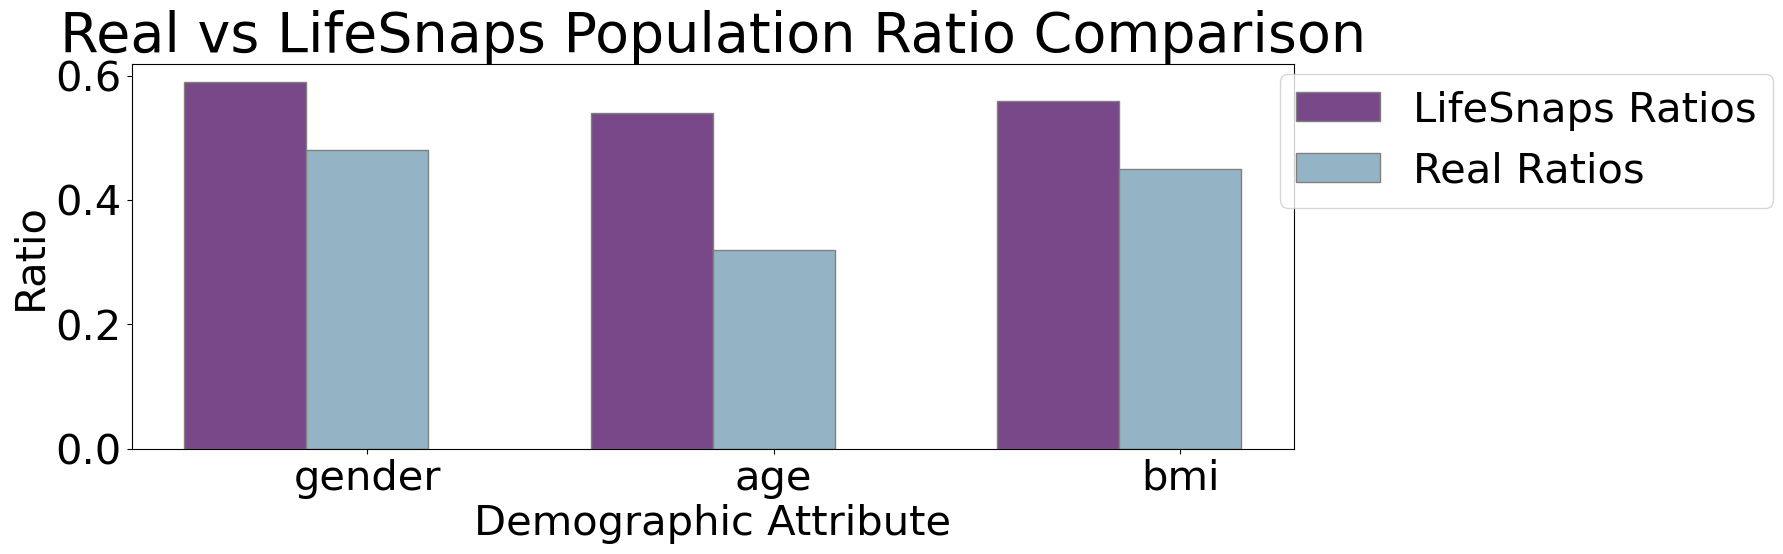

In [10]:
plt.figure(figsize=(15, 5))

barWidth = 0.3

r1 = range(len(ratios_df))
r2 = [x + barWidth for x in r1]

plt.bar(r1, ratios_df['Dataset Ratios'], color='#784888', width=barWidth, edgecolor='grey', label='LifeSnaps Ratios')
plt.bar(r2, ratios_df['Real Ratios'], color='#94b3c4', width=barWidth, edgecolor='grey', label='Real Ratios')

plt.xlabel('Demographic Attribute')
plt.xticks([r + barWidth for r in range(len(ratios_df))], ratios_df['Category'])
plt.ylabel('Ratio')
plt.title('Real vs LifeSnaps Population Ratio Comparison')
plt.legend(loc='center', bbox_to_anchor=(1.2, 0.8), ncol=1)
plt.savefig("../visualizations/lifesnaps/representation-bias.png",bbox_inches='tight')
plt.savefig("../visualizations/lifesnaps/representation-bias.eps",bbox_inches='tight')
plt.show()

# Data biases

In [11]:
sema = df[df['label_stress_sema'].notna()]
sema = sema.drop(columns=['label_panas_negative_affect', 'label_stai_stress', 'id'])
sema

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,bmi,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,label_stress_sema
1,33.274919,52.5365,38.1610,94.5,17.2,72.0,0.733333,0.7,0.700000,-1.056906,...,3,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,1.0
6,34.119702,51.6220,43.5360,97.8,13.8,72.0,0.733333,0.7,0.700000,-0.660352,...,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,0.0
8,34.710232,62.3900,34.0570,96.0,15.0,74.0,0.700000,0.7,0.700000,-1.822489,...,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,0.0
9,33.662874,52.9270,39.9390,95.5,11.2,72.0,0.733333,0.7,0.700000,-1.160651,...,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,0.0
17,32.556993,62.3900,34.0570,96.7,15.0,72.0,0.733333,0.7,0.700000,-0.713499,...,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873,33.892631,62.8590,49.3950,96.0,12.0,72.0,0.733333,0.7,0.766667,-2.691114,...,2,0.866025,-0.781831,0.587785,-0.101168,0.5,0.62349,0.809017,-0.994869,1.0
4888,32.903545,71.8630,25.4750,96.0,18.2,72.0,0.733333,0.7,0.733333,-3.234348,...,3,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1.0
4891,34.716690,58.4890,28.3290,96.5,14.2,72.0,0.733333,0.7,0.700000,-2.096381,...,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,1.0
4900,34.683800,62.3900,34.0570,96.0,15.0,72.0,0.733333,0.7,0.700000,-2.624953,...,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139,0.0


In [12]:
protected_attributes = ['gender', 'age', 'bmi']
privileged_classes = [[0], [0], [1]] # male, below 30 years old, normal bmi

dataset = StandardDataset(sema,
                          label_name='label_stress_sema',
                          favorable_classes=[1],  # not a favorable outcome, but perhaps the most important
                          protected_attribute_names=protected_attributes,
                          privileged_classes=privileged_classes)

sema_bias_columns_metric = pd.DataFrame(columns=['protected_attribute', 'statistical_parity_difference', 'disparate_impact_ratio'])

for attr in dataset.protected_attribute_names:
    print("\nEvaluating Outcome Bias for {}".format(attr))
    idx = dataset.protected_attribute_names.index(attr)
    privileged_groups = [{attr: dataset.privileged_protected_attributes[idx][0]}]
    unprivileged_groups = [{attr: dataset.unprivileged_protected_attributes[idx][0]}]

    metric_data = BinaryLabelDatasetMetric(dataset, unprivileged_groups=unprivileged_groups,
                                           privileged_groups=privileged_groups)

    # Using mean_difference() value as Statistical Parity Difference for explicit naming
    spd = metric_data.mean_difference()

    sema_bias_columns_metric.loc[len(sema_bias_columns_metric.index)] = [attr, spd, metric_data.disparate_impact()]

    print("Group Fairness - Statistical Parity Difference: {}".format(spd))
    print("Group Fairness - Disparate Impact Ratio: {}".format(metric_data.disparate_impact()))

sema_bias_columns_metric


Evaluating Outcome Bias for gender
Group Fairness - Statistical Parity Difference: 0.053747233635605796
Group Fairness - Disparate Impact Ratio: 1.267783203042646

Evaluating Outcome Bias for age
Group Fairness - Statistical Parity Difference: 0.023917817313646256
Group Fairness - Disparate Impact Ratio: 1.1150280144293498

Evaluating Outcome Bias for bmi
Group Fairness - Statistical Parity Difference: -0.02852879213483145
Group Fairness - Disparate Impact Ratio: 0.8808651026392962


,protected_attribute,statistical_parity_difference,disparate_impact_ratio
0,gender,0.053747,1.267783
1,age,0.023918,1.115028
2,bmi,-0.028529,0.880865


**Statistical Parity Difference** measures the difference in the rate of favorable outcomes received by the unprivileged group compared to the privileged group. A value of 0 indicates perfect fairness.
**Disparate Impact Ratio** measures the ratio of probabilities of favorable outcomes for the unprivileged group to that of the privileged group. A value of 1 indicates perfect fairness, values less than 1 indicate less favorable outcomes for the unprivileged group, and values greater than 1 indicate more favorable outcomes for the unprivileged group.

In [13]:
panas = df[df['label_panas_negative_affect'].notna()]
panas = panas.drop(columns=['label_stress_sema', 'label_stai_stress', 'id'])
panas

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,bmi,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,label_panas_negative_affect
298,35.560128,62.390,34.057,96.0,15.0,72.0,0.733333,0.700,0.700000,-2.501502,...,1,-0.866025,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,0
301,34.847500,62.390,34.057,96.0,15.0,72.0,0.733333,0.700,0.700000,-0.840776,...,1,-0.866025,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,1
305,33.926363,56.391,41.789,96.7,13.4,72.0,0.733333,0.700,0.666667,-0.991377,...,1,-0.866025,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,2
310,34.379283,73.504,21.036,98.0,15.2,72.0,0.733333,0.700,0.666667,-1.125404,...,1,-0.866025,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,1
311,34.052594,64.918,54.922,95.7,15.0,72.0,0.733333,0.700,0.700000,-2.376326,...,2,-0.866025,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4707,33.933047,72.324,26.077,96.0,18.8,72.0,0.733333,0.700,0.700000,-1.953560,...,3,0.866025,0.974928,0.587785,6.513725e-01,0.5,-0.222521,0.809017,-0.758758,0
4725,34.097435,51.664,47.480,95.5,12.4,72.0,0.733333,0.725,0.700000,-1.724018,...,1,0.866025,0.974928,0.587785,6.513725e-01,0.5,-0.222521,0.809017,-0.758758,0
4870,34.359505,59.255,26.811,95.4,15.4,72.0,0.700000,0.700,0.766667,-1.696735,...,1,0.866025,-0.781831,0.587785,-1.011683e-01,0.5,0.623490,0.809017,-0.994869,2
4899,33.189233,54.651,40.814,96.0,11.6,72.0,0.733333,0.700,0.700000,-1.536648,...,3,0.866025,0.000000,0.809017,-2.993631e-01,0.5,1.000000,0.587785,-0.954139,1


In [14]:
# conver into binary label
panas['binarylabel_panas_negative_affect'] = panas['label_panas_negative_affect'].apply(lambda x: 1 if x == 1 else 0)

In [15]:
protected_attributes = ['gender', 'age', 'bmi']
privileged_classes = [[0], [0], [1]] # male, below 30 years old, normal bmi

dataset = StandardDataset(panas,
                          label_name='binarylabel_panas_negative_affect',
                          favorable_classes=[1],  # not a favorable outcome, but perhaps the most important
                          protected_attribute_names=protected_attributes,
                          privileged_classes=privileged_classes)

panas_bias_columns_metric = pd.DataFrame(columns=['protected_attribute', 'statistical_parity_difference', 'disparate_impact_ratio'])

for attr in dataset.protected_attribute_names:
    print("\nEvaluating Outcome Bias for {}".format(attr))
    idx = dataset.protected_attribute_names.index(attr)
    privileged_groups = [{attr: dataset.privileged_protected_attributes[idx][0]}]
    unprivileged_groups = [{attr: dataset.unprivileged_protected_attributes[idx][0]}]

    metric_data = BinaryLabelDatasetMetric(dataset, unprivileged_groups=unprivileged_groups,
                                           privileged_groups=privileged_groups)

    # Using mean_difference() value as Statistical Parity Difference for explicit naming
    spd = metric_data.mean_difference()

    panas_bias_columns_metric.loc[len(panas_bias_columns_metric.index)] = [attr, spd, metric_data.disparate_impact()]

    print("Group Fairness - Statistical Parity Difference: {}".format(spd))
    print("Group Fairness - Disparate Impact Ratio: {}".format(metric_data.disparate_impact()))

panas_bias_columns_metric


Evaluating Outcome Bias for gender
Group Fairness - Statistical Parity Difference: -0.07068273092369476
Group Fairness - Disparate Impact Ratio: 0.7904761904761906

Evaluating Outcome Bias for age
Group Fairness - Statistical Parity Difference: -0.08301287920405298
Group Fairness - Disparate Impact Ratio: 0.7657192075796727

Evaluating Outcome Bias for bmi
Group Fairness - Statistical Parity Difference: -0.13776978417266186
Group Fairness - Disparate Impact Ratio: 0.52125


,protected_attribute,statistical_parity_difference,disparate_impact_ratio
0,gender,-0.070683,0.790476
1,age,-0.083013,0.765719
2,bmi,-0.137770,0.521250


In [16]:
stai = df[df['label_stai_stress'].notna()]
stai = stai.drop(columns=['label_stress_sema', 'label_panas_negative_affect', 'id'])
stai

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,bmi,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,label_stai_stress
298,35.560128,62.3900,34.057,96.0,15.0,72.0,0.733333,0.700,0.700000,-2.501502,...,1,-0.866025,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,0
301,34.847500,62.3900,34.057,96.0,15.0,72.0,0.733333,0.700,0.700000,-0.840776,...,1,-0.866025,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,1
302,33.274919,52.5365,38.161,94.5,17.2,72.0,0.733333,0.700,0.700000,-1.056906,...,3,-0.866025,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,2
305,33.926363,56.3910,41.789,96.7,13.4,72.0,0.733333,0.700,0.666667,-0.991377,...,1,-0.866025,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,2
310,34.379283,73.5040,21.036,98.0,15.2,72.0,0.733333,0.700,0.666667,-1.125404,...,1,-0.866025,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4707,33.933047,72.3240,26.077,96.0,18.8,72.0,0.733333,0.700,0.700000,-1.953560,...,3,0.866025,0.974928,0.587785,6.513725e-01,0.5,-0.222521,0.809017,-0.758758,1
4725,34.097435,51.6640,47.480,95.5,12.4,72.0,0.733333,0.725,0.700000,-1.724018,...,1,0.866025,0.974928,0.587785,6.513725e-01,0.5,-0.222521,0.809017,-0.758758,1
4870,34.359505,59.2550,26.811,95.4,15.4,72.0,0.700000,0.700,0.766667,-1.696735,...,1,0.866025,-0.781831,0.587785,-1.011683e-01,0.5,0.623490,0.809017,-0.994869,2
4899,33.189233,54.6510,40.814,96.0,11.6,72.0,0.733333,0.700,0.700000,-1.536648,...,3,0.866025,0.000000,0.809017,-2.993631e-01,0.5,1.000000,0.587785,-0.954139,0


In [17]:
# conver into binary label
stai['binarylabel_stai_stress'] = stai['label_stai_stress'].apply(lambda x: 1 if x == 1 else 0)

In [18]:
protected_attributes = ['gender', 'age', 'bmi']
privileged_classes = [[0], [0], [1]] # male, below 30 years old, normal bmi

dataset = StandardDataset(stai,
                          label_name='binarylabel_stai_stress',
                          favorable_classes=[1],  # not a favorable outcome, but perhaps the most important
                          protected_attribute_names=protected_attributes,
                          privileged_classes=privileged_classes)

stai_bias_columns_metric = pd.DataFrame(columns=['protected_attribute', 'statistical_parity_difference', 'disparate_impact_ratio'])

for attr in dataset.protected_attribute_names:
    print("\nEvaluating Outcome Bias for {}".format(attr))
    idx = dataset.protected_attribute_names.index(attr)
    privileged_groups = [{attr: dataset.privileged_protected_attributes[idx][0]}]
    unprivileged_groups = [{attr: dataset.unprivileged_protected_attributes[idx][0]}]

    metric_data = BinaryLabelDatasetMetric(dataset, unprivileged_groups=unprivileged_groups,
                                           privileged_groups=privileged_groups)

    # Using mean_difference() value as Statistical Parity Difference for explicit naming
    spd = metric_data.mean_difference()

    stai_bias_columns_metric.loc[len(stai_bias_columns_metric.index)] = [attr, spd, metric_data.disparate_impact()]

    print("Group Fairness - Statistical Parity Difference: {}".format(spd))
    print("Group Fairness - Disparate Impact Ratio: {}".format(metric_data.disparate_impact()))

stai_bias_columns_metric


Evaluating Outcome Bias for gender
Group Fairness - Statistical Parity Difference: -0.015706488781079442
Group Fairness - Disparate Impact Ratio: 0.9531560860915175

Evaluating Outcome Bias for age
Group Fairness - Statistical Parity Difference: -0.00724637681159418
Group Fairness - Disparate Impact Ratio: 0.9782608695652174

Evaluating Outcome Bias for bmi
Group Fairness - Statistical Parity Difference: -0.1581081081081081
Group Fairness - Disparate Impact Ratio: 0.5584905660377358


,protected_attribute,statistical_parity_difference,disparate_impact_ratio
0,gender,-0.015706,0.953156
1,age,-0.007246,0.978261
2,bmi,-0.158108,0.558491


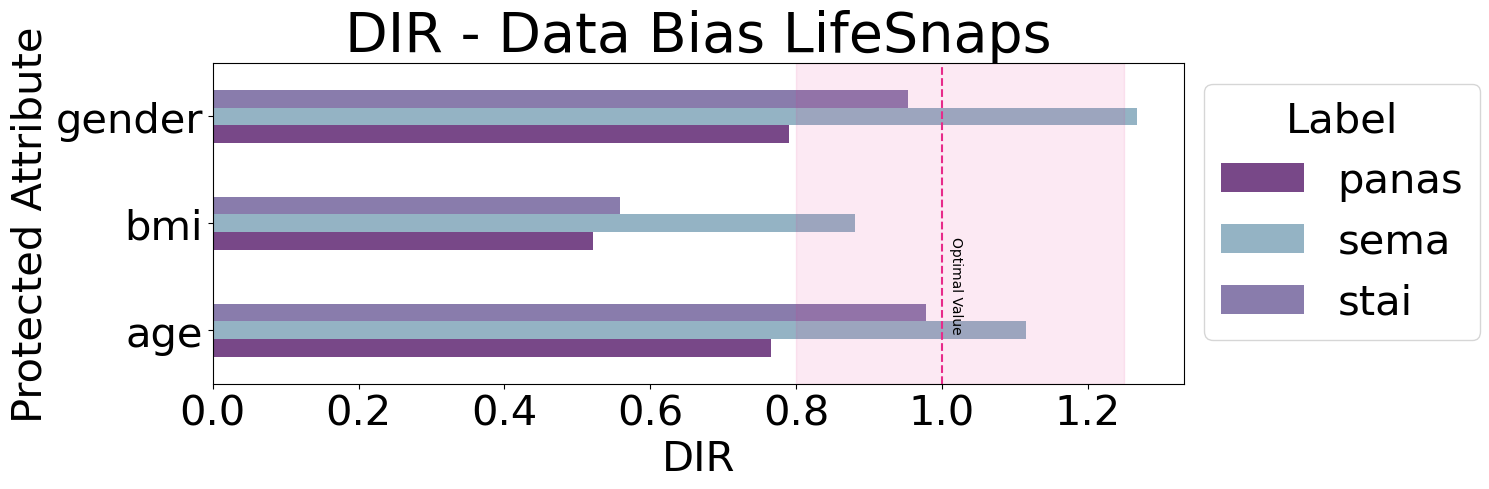

In [19]:
sema_bias_columns_metric['Label'] = 'sema'
panas_bias_columns_metric['Label'] = 'panas'
stai_bias_columns_metric['Label'] = 'stai'

combined_bias_metrics = pd.concat([sema_bias_columns_metric, panas_bias_columns_metric, stai_bias_columns_metric])

pivot_df = combined_bias_metrics.pivot(index='protected_attribute', columns='Label', values='disparate_impact_ratio')

pivot_df.plot(kind='barh', figsize=(15, 5))
plt.axvline(x=1.0, color='#e72a8a', linestyle='--')
plt.axvspan(0.8, 1.25, color='#e72a8a', alpha=0.1)
plt.text(1.01, 0, 'Optimal Value', rotation=270)
plt.ylabel('Protected Attribute')
plt.xlabel('DIR')
plt.title('DIR - Data Bias LifeSnaps')
plt.legend(title='Label', title_fontsize=30, bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.savefig("../visualizations/lifesnaps/dir-data-bias.png",bbox_inches='tight')
plt.savefig("../visualizations/lifesnaps/dir-data-bias.eps",bbox_inches='tight')
plt.show()

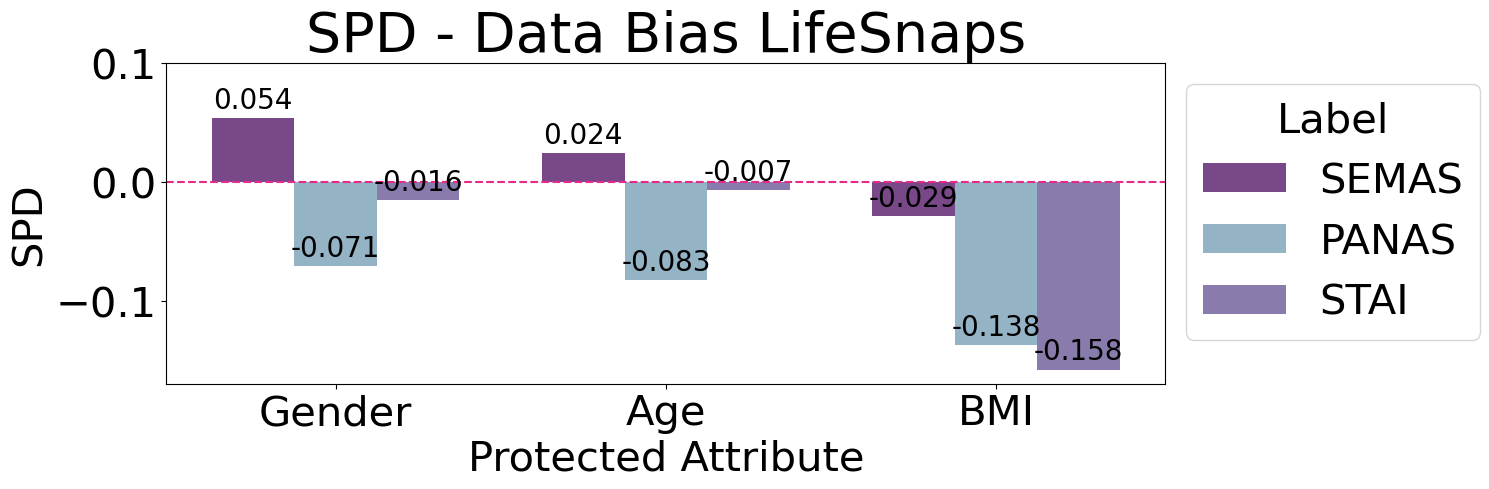

In [20]:
spd_stai = np.array([-0.015706, -0.007246, -0.158108])   # STAI
spd_panas = np.array([-0.070683, -0.083013, -0.137770])  # PANAS
spd_semas = np.array([0.053747, 0.023918, -0.028529])    # SEMAS

attributes = ['Gender', 'Age', 'BMI']
x = np.arange(len(attributes))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x - width, spd_semas, width, label='SEMAS')
rects2 = ax.bar(x, spd_panas, width, label='PANAS')
rects3 = ax.bar(x + width, spd_stai, width, label='STAI')

ax.set_ylabel('SPD')
ax.set_title('SPD - Data Bias LifeSnaps')
plt.xlabel('Protected Attribute')
ax.set_xticks(x)
plt.ylim(-0.17, 0.1)
ax.set_xticklabels(attributes)
plt.legend(title='Label', title_fontsize=30, bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.axhline(y=0, color='#e72a8a', linestyle='--')
# Function to attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size=20)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.savefig("../visualizations/lifesnaps/spd-data-bias.png",bbox_inches='tight')
plt.savefig("../visualizations/lifesnaps/spd-data-bias.eps",bbox_inches='tight')
fig.tight_layout()
plt.show()

# Model bias
The 'test_pred_dataset' in the context of using AI Fairness 360 (AIF360) is essentially a dataset that represents your test data, but with the model's predictions substituted for the true labels.

In [21]:
X_test = pd.read_csv('../data/lifesnaps/predictions/sema_X_test_generic.csv')
y_test = pd.read_csv('../data/lifesnaps/predictions/sema_y_test_generic.csv')
y_pred = pd.read_csv('../data/lifesnaps/predictions/sema_pred_generic.csv')

print("Missing values in X_test:", X_test.isna().any().any())
print("Missing values in y_test:", y_test.isna().any())
print("Missing values in y_pred:", pd.DataFrame(y_pred).isna().any().any())

print(X_test.index)
print(y_test.index)
print(y_pred.index)

protected_attributes = ['gender', 'age', 'bmi']
privileged_classes = [[0], [0], [1]] # male, below 30 years old, normal bmi

true_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_test], axis=1),
    label_names=['label_stress_sema'],
    protected_attribute_names=protected_attributes
)

pred_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_pred], axis=1),
    label_names=['label_stress_sema'],
    protected_attribute_names=protected_attributes
)

privileged_groups = [{'gender': 0, 'age': 0, 'bmi':1}]  # male, below 30 years old, normal bmi
unprivileged_groups = [{'gender': 1, 'age': 1, 'bmi':0}]

dataset_metric = BinaryLabelDatasetMetric(
    true_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

classification_metric = ClassificationMetric(
    true_dataset,
    pred_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)
print("----------------")
print("Generic model SEMA")
print("----------------")
print("Disparate Impact:", dataset_metric.disparate_impact())
print("Statistical Parity Difference:", dataset_metric.statistical_parity_difference())

Missing values in X_test: False
Missing values in y_test: label_stress_sema    False
dtype: bool
Missing values in y_pred: False
RangeIndex(start=0, stop=564, step=1)
RangeIndex(start=0, stop=564, step=1)
RangeIndex(start=0, stop=564, step=1)
----------------
Generic model SEMA
----------------
Disparate Impact: 0.9775641025641026
Statistical Parity Difference: -0.0095628415300546


In [22]:
X_test = pd.read_csv('../data/lifesnaps/predictions/sema_X_test_LOPO.csv')
y_test = pd.read_csv('../data/lifesnaps/predictions/sema_y_test_LOPO.csv')
y_pred = pd.read_csv('../data/lifesnaps/predictions/sema_y_pred_LOPO.csv')

print("Missing values in X_test:", X_test.isna().any().any())
print("Missing values in y_test:", y_test.isna().any())
print("Missing values in y_pred:", pd.DataFrame(y_pred).isna().any().any())

print(X_test.index)
print(y_test.index)
print(y_pred.index)

protected_attributes = ['gender', 'age', 'bmi']
privileged_classes = [[0], [0], [1]] # male, below 30 years old, normal bmi

true_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_test], axis=1),
    label_names=['label_stress_sema'],
    protected_attribute_names=protected_attributes
)

pred_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_pred], axis=1),
    label_names=['label_stress_sema'],
    protected_attribute_names=protected_attributes
)

privileged_groups = [{'gender': 0, 'age': 0, 'bmi':1}]  # male, below 30 years old, normal bmi
unprivileged_groups = [{'gender': 1, 'age': 1, 'bmi':0}]

dataset_metric = BinaryLabelDatasetMetric(
    true_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

classification_metric = ClassificationMetric(
    true_dataset,
    pred_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)
print("----------------")
print("LOPO SEMA")
print("----------------")
print("Disparate Impact:", dataset_metric.disparate_impact())
print("Statistical Parity Difference:", dataset_metric.statistical_parity_difference())

Missing values in X_test: False
Missing values in y_test: label_stress_sema    False
dtype: bool
Missing values in y_pred: False
RangeIndex(start=0, stop=2246, step=1)
RangeIndex(start=0, stop=2246, step=1)
RangeIndex(start=0, stop=2246, step=1)
----------------
LOPO SEMA
----------------
Disparate Impact: 1.1185314685314685
Statistical Parity Difference: 0.028530550412388472


In [23]:
X_test = pd.read_csv('../data/lifesnaps/predictions/stai_X_test_generic.csv')
y_test = pd.read_csv('../data/lifesnaps/predictions/stai_y_test_generic.csv')
y_pred = pd.read_csv('../data/lifesnaps/predictions/stai_pred_generic.csv')

print("Missing values in X_test:", X_test.isna().any().any())
print("Missing values in y_test:", y_test.isna().any())
print("Missing values in y_pred:", pd.DataFrame(y_pred).isna().any().any())

print(X_test.index)
print(y_test.index)
print(y_pred.index)

protected_attributes = ['gender', 'age', 'bmi']
privileged_classes = [[0], [0], [1]]  # male, below 30 years old, normal bmi

y_test['label_stai_stress'] = y_test['label_stai_stress'].apply(lambda x: 1 if x == 1 else 0)
y_pred['label_stai_stress'] = y_pred['label_stai_stress'].apply(lambda x: 1 if x == 1 else 0)

true_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_test], axis=1),
    label_names=['label_stai_stress'],
    protected_attribute_names=protected_attributes
)

pred_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_pred], axis=1),
    label_names=['label_stai_stress'],
    protected_attribute_names=protected_attributes
)

privileged_groups = [{'gender': 0, 'age': 0, 'bmi':1}]  # male, below 30 years old, normal bmi
unprivileged_groups = [{'gender': 1, 'age': 1, 'bmi':0}]

dataset_metric = BinaryLabelDatasetMetric(
    true_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

classification_metric = ClassificationMetric(
    true_dataset,
    pred_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)
print("----------------")
print("Generic model stai")
print("----------------")
print("Disparate Impact:", dataset_metric.disparate_impact())
print("Statistical Parity Difference:", dataset_metric.statistical_parity_difference())

Missing values in X_test: False
Missing values in y_test: label_stai_stress    False
dtype: bool
Missing values in y_pred: False
RangeIndex(start=0, stop=68, step=1)
RangeIndex(start=0, stop=68, step=1)
RangeIndex(start=0, stop=68, step=1)
----------------
Generic model stai
----------------
Disparate Impact: 0.0
Statistical Parity Difference: -0.5


In [24]:
X_test = pd.read_csv('../data/lifesnaps/predictions/stai_X_test_LOPO.csv')
y_test = pd.read_csv('../data/lifesnaps/predictions/stai_y_test_LOPO.csv')
y_pred = pd.read_csv('../data/lifesnaps/predictions/stai_y_pred_LOPO.csv')

print("Missing values in X_test:", X_test.isna().any().any())
print("Missing values in y_test:", y_test.isna().any())
print("Missing values in y_pred:", pd.DataFrame(y_pred).isna().any().any())

print(X_test.index)
print(y_test.index)
print(y_pred.index)

protected_attributes = ['gender', 'age', 'bmi']
privileged_classes = [[0], [0], [1]]  # male, below 30 years old, normal bmi

y_test['label_stai_stress'] = y_test['label_stai_stress'].apply(lambda x: 1 if x == 1 else 0)
y_pred['label_stai_stress'] = y_pred['label_stai_stress'].apply(lambda x: 1 if x == 1 else 0)

true_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_test], axis=1),
    label_names=['label_stai_stress'],
    protected_attribute_names=protected_attributes
)

pred_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_pred], axis=1),
    label_names=['label_stai_stress'],
    protected_attribute_names=protected_attributes
)

privileged_groups = [{'gender': 0, 'age': 0, 'bmi':1}]  # male, below 30 years old, normal bmi
unprivileged_groups = [{'gender': 1, 'age': 1, 'bmi':0}]

dataset_metric = BinaryLabelDatasetMetric(
    true_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

classification_metric = ClassificationMetric(
    true_dataset,
    pred_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)
print("----------------")
print("LOPO stai")
print("----------------")
print("Disparate Impact:", dataset_metric.disparate_impact())
print("Statistical Parity Difference:", dataset_metric.statistical_parity_difference())

Missing values in X_test: False
Missing values in y_test: label_stai_stress    False
dtype: bool
Missing values in y_pred: False
RangeIndex(start=0, stop=267, step=1)
RangeIndex(start=0, stop=267, step=1)
RangeIndex(start=0, stop=267, step=1)
----------------
LOPO stai
----------------
Disparate Impact: 0.0
Statistical Parity Difference: -0.34285714285714286


In [25]:
X_test = pd.read_csv('../data/lifesnaps/predictions/panas_X_test_generic.csv')
y_test = pd.read_csv('../data/lifesnaps/predictions/panas_y_test_generic.csv')
y_pred = pd.read_csv('../data/lifesnaps/predictions/panas_pred_generic.csv')

print("Missing values in X_test:", X_test.isna().any().any())
print("Missing values in y_test:", y_test.isna().any())
print("Missing values in y_pred:", pd.DataFrame(y_pred).isna().any().any())

print(X_test.index)
print(y_test.index)
print(y_pred.index)

protected_attributes = ['gender', 'age', 'bmi']
privileged_classes = [[0], [0], [1]]  # male, below 30 years old, normal bmi

y_test['label_panas_negative_affect'] = y_test['label_panas_negative_affect'].apply(lambda x: 1 if x == 1 else 0)
y_pred['label_panas_negative_affect'] = y_pred['label_panas_negative_affect'].apply(lambda x: 1 if x == 1 else 0)

true_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_test], axis=1),
    label_names=['label_panas_negative_affect'],
    protected_attribute_names=protected_attributes
)

pred_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_pred], axis=1),
    label_names=['label_panas_negative_affect'],
    protected_attribute_names=protected_attributes
)

privileged_groups = [{'gender': 0, 'age': 0, 'bmi':1}]  # male, below 30 years old, normal bmi
unprivileged_groups = [{'gender': 1, 'age': 1, 'bmi':0}]

dataset_metric = BinaryLabelDatasetMetric(
    true_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

classification_metric = ClassificationMetric(
    true_dataset,
    pred_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)
print("----------------")
print("Generic model panas")
print("----------------")
print("Disparate Impact:", dataset_metric.disparate_impact())
print("Statistical Parity Difference:", dataset_metric.statistical_parity_difference())

Missing values in X_test: False
Missing values in y_test: label_panas_negative_affect    False
dtype: bool
Missing values in y_pred: False
RangeIndex(start=0, stop=69, step=1)
RangeIndex(start=0, stop=69, step=1)
RangeIndex(start=0, stop=69, step=1)
----------------
Generic model panas
----------------
Disparate Impact: 0.5555555555555556
Statistical Parity Difference: -0.26666666666666666


In [26]:
X_test = pd.read_csv('../data/lifesnaps/predictions/panas_X_test_LOPO.csv')
y_test = pd.read_csv('../data/lifesnaps/predictions/panas_y_test_LOPO.csv')
y_pred = pd.read_csv('../data/lifesnaps/predictions/panas_y_pred_LOPO.csv')

print("Missing values in X_test:", X_test.isna().any().any())
print("Missing values in y_test:", y_test.isna().any())
print("Missing values in y_pred:", pd.DataFrame(y_pred).isna().any().any())

print(X_test.index)
print(y_test.index)
print(y_pred.index)

protected_attributes = ['gender', 'age', 'bmi']
privileged_classes = [[0], [0], [1]]  # male, below 30 years old, normal bmi

y_test['label_panas_negative_affect'] = y_test['label_panas_negative_affect'].apply(lambda x: 1 if x == 1 else 0)
y_pred['label_panas_negative_affect'] = y_pred['label_panas_negative_affect'].apply(lambda x: 1 if x == 1 else 0)

true_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_test], axis=1),
    label_names=['label_panas_negative_affect'],
    protected_attribute_names=protected_attributes
)

pred_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_pred], axis=1),
    label_names=['label_panas_negative_affect'],
    protected_attribute_names=protected_attributes
)

privileged_groups = [{'gender': 0, 'age': 0, 'bmi':1}]  # male, below 30 years old, normal bmi
unprivileged_groups = [{'gender': 1, 'age': 1, 'bmi':0}]

dataset_metric = BinaryLabelDatasetMetric(
    true_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

classification_metric = ClassificationMetric(
    true_dataset,
    pred_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

print("----------------")
print("LOPO panas")
print("----------------")
print("Disparate Impact:", dataset_metric.disparate_impact())
print("Statistical Parity Difference:", dataset_metric.statistical_parity_difference())

Missing values in X_test: False
Missing values in y_test: label_panas_negative_affect    False
dtype: bool
Missing values in y_pred: False
RangeIndex(start=0, stop=256, step=1)
RangeIndex(start=0, stop=256, step=1)
RangeIndex(start=0, stop=256, step=1)
----------------
LOPO panas
----------------
Disparate Impact: 0.9444444444444443
Statistical Parity Difference: -0.019607843137254943


In [27]:
dir_data = {
    'Model': ['Sema', 'Panas', 'Stai'],
    'Generic': [0.98, 0.56, 0],
    'Personalized': [1.12, 0.95, 0]
}

spd_data = {
    'Model': ['Sema', 'Panas', 'Stai'],
    'Generic': [-0.01, -0.27, -0.5],
    'Personalized': [0.03, -0.02, -0.34]
}

dir_df = pd.DataFrame(dir_data)
spd_df = pd.DataFrame(spd_data)

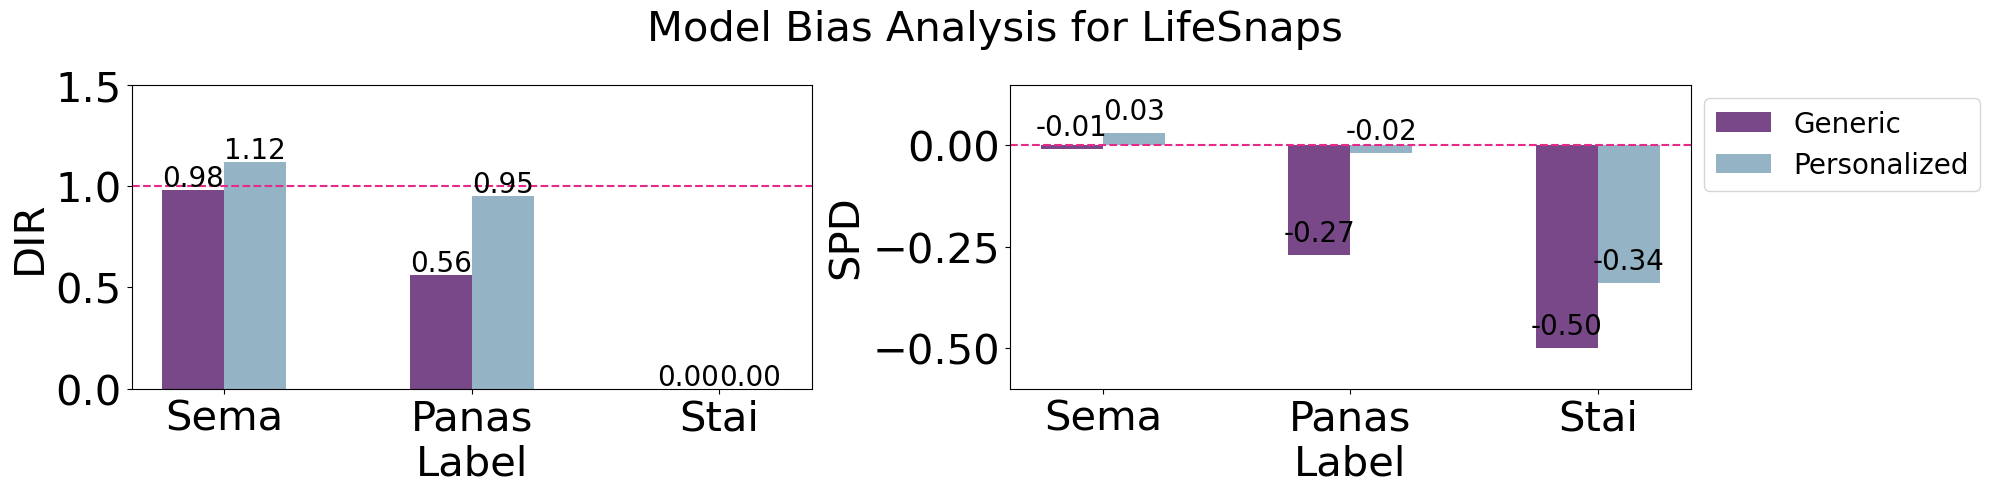

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), tight_layout=True)

bar_positions_generic = np.arange(len(dir_df['Model']))  # generic model bar positions
bar_positions_personalized = bar_positions_generic + width  # personalized model bar positions

# Bar plot for DIR
axes[0].bar(bar_positions_generic, dir_df['Generic'], width, label='Generic')
axes[0].bar(bar_positions_personalized, dir_df['Personalized'], width, label='Personalized')
axes[0].axhline(y=1, color='#e72a8a', linestyle='--')
# Adding text labels above bars for DIR
for index, value in enumerate(dir_df['Generic']):
    axes[0].text(index, value + 0.02, f'{value:.2f}', ha='center', fontsize=20)
for index, value in enumerate(dir_df['Personalized']):
    axes[0].text(index + width, value + 0.02, f'{value:.2f}', ha='center', fontsize=20)
#axes[0].set_title('Model bias-LifeSnaps')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('DIR')
axes[0].set_ylim(0, 1.5)
axes[0].set_xticks(bar_positions_generic + width / 2)
axes[0].set_xticklabels(dir_df['Model'])
#axes[0].legend()

# Bar plot for SPD
axes[1].bar(bar_positions_generic, spd_df['Generic'], width, label='Generic')
axes[1].bar(bar_positions_personalized, spd_df['Personalized'], width, label='Personalized')
axes[1].axhline(y=0, color='#e72a8a', linestyle='--')
# Adding text labels above bars for SPD
for index, value in enumerate(spd_df['Generic']):
    axes[1].text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom' if value < 0 else 'bottom', fontsize=20)
for index, value in enumerate(spd_df['Personalized']):
    axes[1].text(index + width, value + 0.02, f'{value:.2f}', ha='center', va='bottom' if value < 0 else 'bottom', fontsize=20)
#axes[1].set_title('SPD')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('SPD')
axes[1].set_ylim(-0.6, 0.15)
axes[1].set_xticks(bar_positions_generic + width / 2)
axes[1].set_xticklabels(spd_df['Model'])
axes[1].legend(bbox_to_anchor=(1, 1), fontsize=20)
fig.suptitle('Model Bias Analysis for LifeSnaps', size=30)
plt.savefig("../visualizations/lifesnaps/lifesnaps-model-bias.png",bbox_inches='tight')
plt.savefig("../visualizations/lifesnaps/lifesnaps-model-bias.eps",bbox_inches='tight')
plt.show()